### Import libraries 

In [124]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [125]:
# load data
os.chdir ('C:\\Users\\Adesh mishra\\OneDrive\\Desktop\\ML  Case study\\New folder (4)')

In [126]:
cloth_review = pd.read_excel('Womens Clothing Reviews Data.xlsx')

In [258]:
# Exploratary data Analysis

In [127]:
cloth_review.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [128]:
cloth_review.info() # display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [129]:
cloth_review.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [130]:
cloth_review.dropna(inplace=True)

In [131]:
cloth_review.isnull().sum()

Product ID        0
Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer Age      0
Review Title      0
Review Text       0
Rating            0
Recommend Flag    0
dtype: int64

In [132]:
cloth_review.duplicated().sum()

0

In [133]:
cloth_review.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')

In [134]:
# Handle missing values in 'Review Text'
cloth_review['Review Text'].fillna('', inplace=True)

In [135]:
cloth_review.describe()


,Product ID,Customer Age,Rating,Recommend Flag
count,19662.000000,19662.000000,19662.000000,19662.000000
mean,921.297274,43.260808,4.183145,0.818177
std,200.227528,12.258122,1.112224,0.385708
min,1.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000


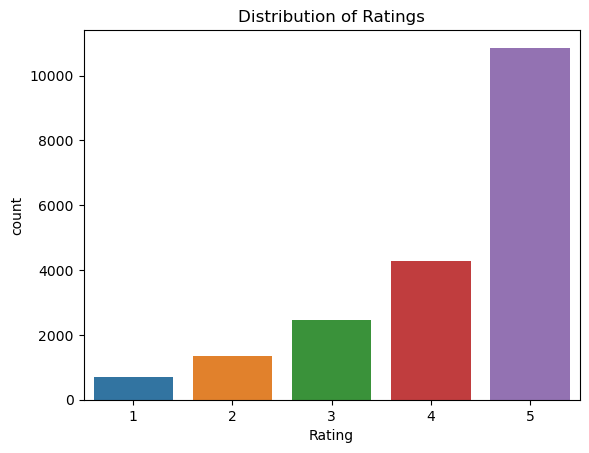

In [136]:
# plot the distribution of ratings
sns.countplot(x='Rating',data=cloth_review)
plt.title('Distribution of Ratings')
plt.show()

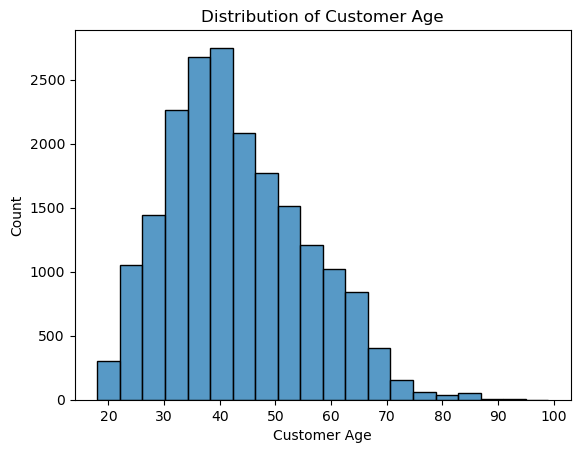

In [137]:
# Distribution of customer age
sns.histplot(cloth_review['Customer Age'],bins = 20)
plt.title('Distribution of Customer Age')
plt.show()

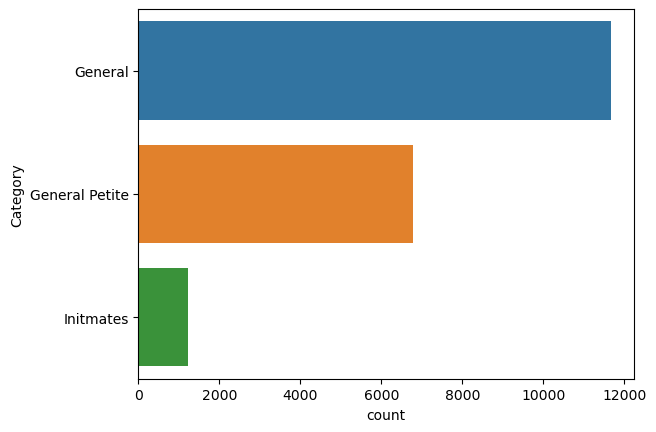

In [138]:
#Count of reviews by category
sns.countplot(y='Category',data=cloth_review,order=cloth_review['Category'].value_counts().index)
plt.show()

### Text mining and word clouds

In [139]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [140]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Adesh
[nltk_data]     mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Adesh
[nltk_data]     mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [158]:
cloth_review['Review Text'].fillna(' ', inplace=True)

#word Cloud for positive Reviews
positive_reviews=" ".join(cloth_review[cloth_review['Rating']>=4]['Review Text'].astype(str))
wordcloud_positive = WordCloud(width = 800,height = 800,
                              background_color = 'black',
                              stopwords=stopwords.words('english'),
                              min_font_size = 10).generate(positive_reviews)



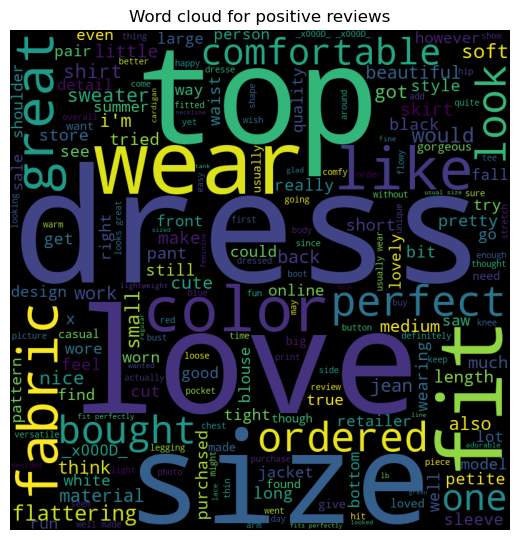

In [167]:
plt.figure(figsize=(5,5),facecolor = None)
plt.imshow(wordcloud_positive)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word cloud for positive reviews')
plt.show()

In [199]:
# word cloud for Negative Reviews
negative_reviews=" ".join(cloth_review[cloth_review['Rating']<4]['Review Text'].astype(str))
wordcloud_negative = WordCloud(width = 800,height = 800,
                              background_color = 'black',
                              stopwords=stopwords.words('english'),
                              min_font_size = 10).generate(negative_reviews)


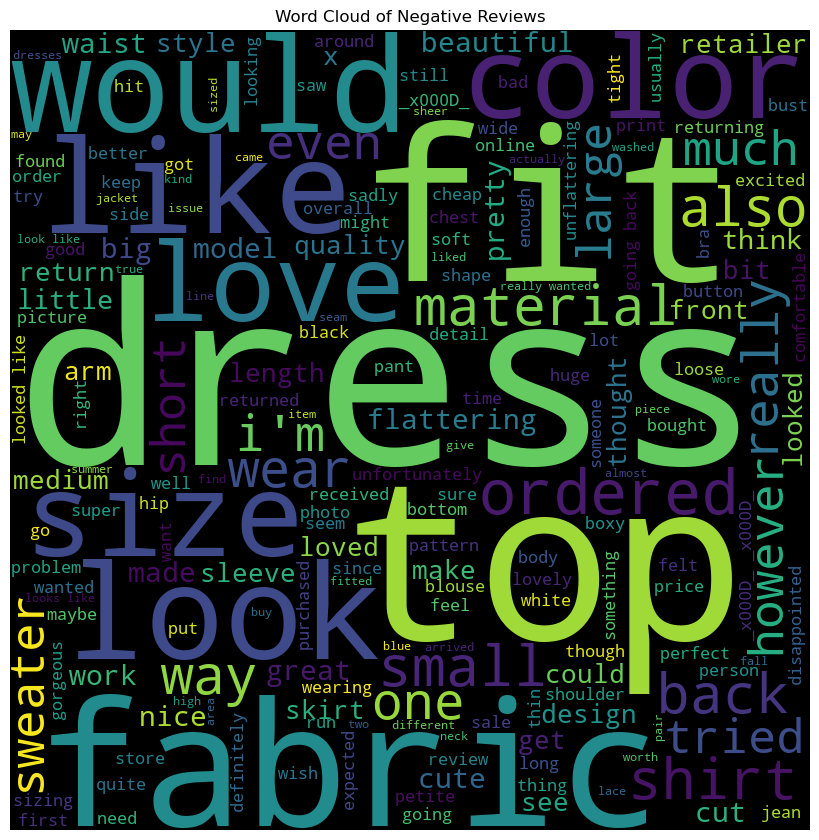

In [201]:
plt.figure(figsize = (8,8))
plt.imshow(wordcloud_negative)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud of Negative Reviews')
plt.show()

####  Sentiment Analysis by category

In [175]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


In [178]:
# Assuming 4 and 5 rating as positive
cloth_review['Sentiment'] = np.where(cloth_review['Rating']>=4,'positive','Negative')

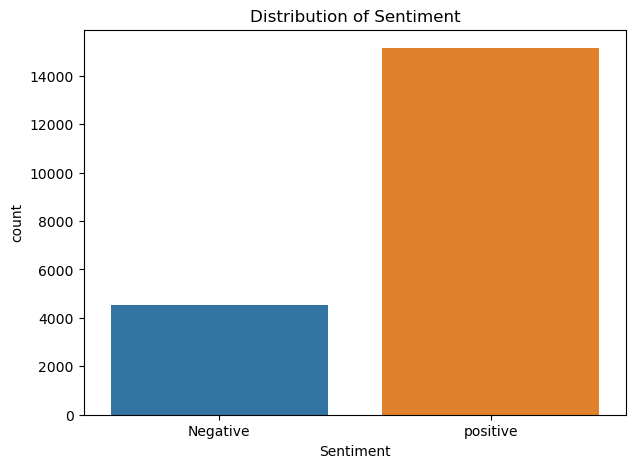

In [179]:
# Visualize Sentiment distribution
plt.figure(figsize = (7,5))
sns.countplot(x = 'Sentiment',data = cloth_review)
plt.title('Distribution of Sentiment')
plt.show()

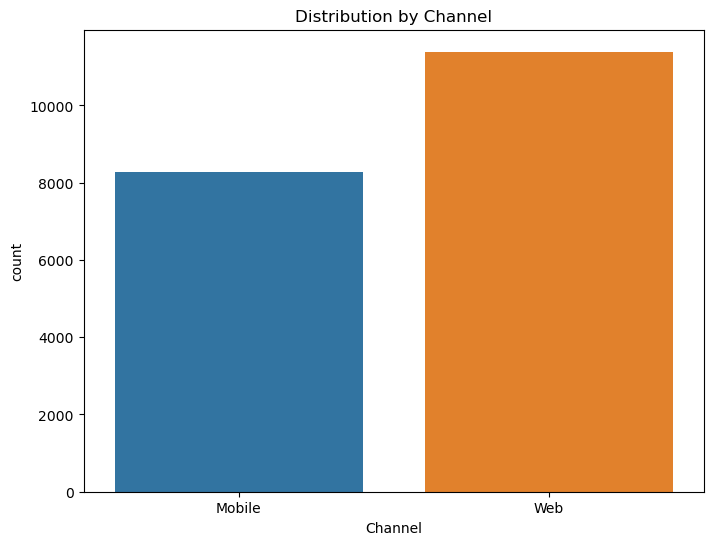

In [180]:
# Distribution of channel
plt.figure(figsize = (8,6))
sns.countplot(x='Channel',data=cloth_review)
plt.title('Distribution by Channel')
plt.show()

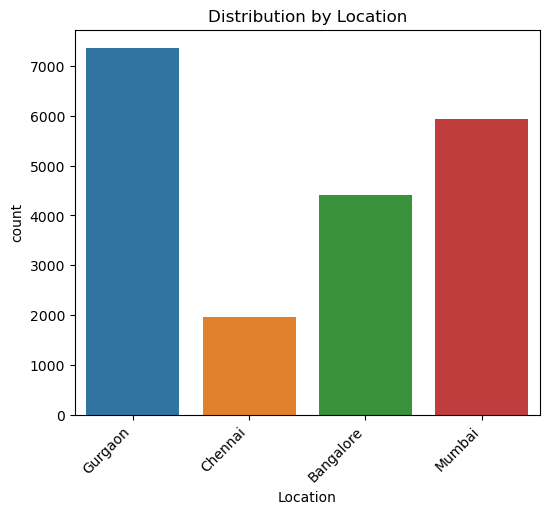

In [181]:
# distribution by Location
plt.figure(figsize = (6,5))
sns.countplot(x='Location',data=cloth_review)
plt.title('Distribution by Location')
plt.xticks(rotation=45,ha='right')
plt.show()

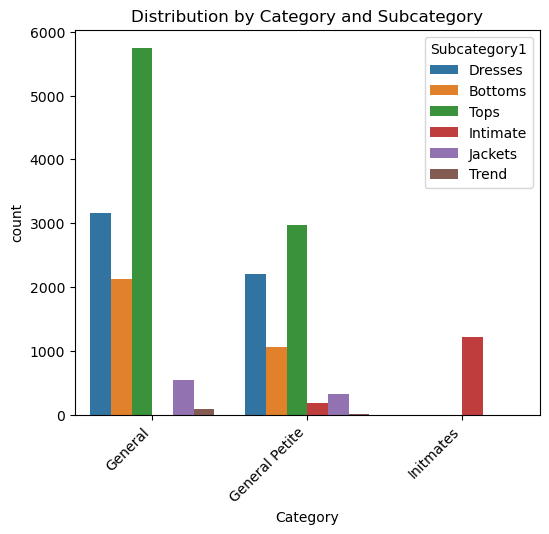

In [183]:
# distribution by Category and subcategoryies
plt.figure(figsize=(6,5))
sns.countplot(x='Category',hue = 'Subcategory1',data=cloth_review)
plt.title('Distribution by Category and Subcategory')
plt.xticks(rotation=45,ha='right')
plt.show()

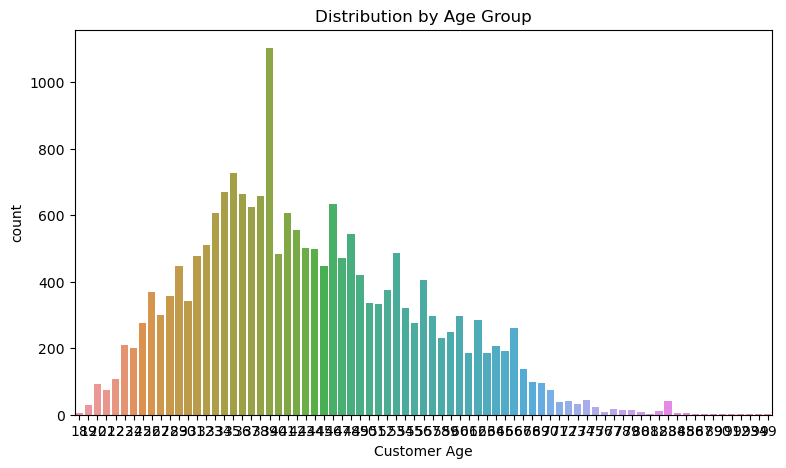

In [186]:
#Distribution by Age Group
plt.figure(figsize=(9,5))
sns.countplot(x='Customer Age',data = cloth_review)
plt.title('Distribution by Age Group')
plt.show()

### Predictive Analysis

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [247]:
#split the data
train_x,test_x,train_y,test_y = train_test_split(cloth_review['Review Text'],cloth_review['Recommend Flag'],test_size=0.2,random_state=42)

vectorizer = TfidfVectorizer(stop_words = 'english')
train_vect_x = vectorizer.fit_transform(train_x.astype(str))
test_vect_x = vectorizer.transform(test_x.astype(str))

####  RandomForestClassifier

In [244]:
model_rf =RandomForestClassifier(random_state=42)
model_rf.fit(train_vect_x,train_y)

RandomForestClassifier(random_state=42)

In [248]:
pridictions= model_rf.predict(test_vect_x)

In [250]:

print(f'Accuracy:{accuracy_score(test_y,pridictions)}')
print(classification_report(test_y,pridictions))

Accuracy:0.8586320874650394
              precision    recall  f1-score   support

           0       0.86      0.25      0.38       700
           1       0.86      0.99      0.92      3233

    accuracy                           0.86      3933
   macro avg       0.86      0.62      0.65      3933
weighted avg       0.86      0.86      0.82      3933



In [215]:
#Topic mining
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [221]:
model_lda = CountVectorizer(stop_words='english')
lda_x =model_lda.fit_transform(cloth_review['Review Text'])

In [222]:
#Build the LDA model
lda= LatentDirichletAllocation(n_components=5,random_state=42)
lda.fit(lda_x)

LatentDirichletAllocation(n_components=5, random_state=42)

In [227]:
# Display top 20 words for each topic
feature_names = model_lda.get_feature_names_out()

for topic_idx,topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-21:-1]
    top_keywords = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx+1}: {', '.join(top_keywords)}")

Topic #1: color, _x000d_, like, dress, fabric, fit, looks, blue, beautiful, really, look, ordered, love, nice, size, person, colors, just, picture, flattering
Topic #2: dress, size, small, fit, just, large, ordered, like, love, really, wear, medium, big, beautiful, look, runs, chest, fabric, usually, petite
Topic #3: price, just, sale, store, like, fabric, shirt, material, online, pants, tried, looked, cute, love, didn, quality, nice, loved, worth, saw
Topic #4: love, great, wear, dress, perfect, comfortable, jeans, fit, soft, size, bought, like, flattering, just, color, sweater, summer, fits, got, long
Topic #5: size, fit, small, like, wear, little, waist, fabric, bit, look, love, xs, petite, just, short, skirt, ordered, great, nice, medium


#### Classification model for predicting Ratings


In [255]:
from sklearn.ensemble import RandomForestClassifier
# predicting Ratings based on Reviews
train_rat_x,test_rat_x,train_rat_y,test_rat_y = train_test_split(cloth_review['Review Text'],cloth_review['Rating'],test_size = 0.2,random_state=42)

classifier_rating = RandomForestClassifier(random_state = 42)
classifier_rating.fit(train_vect_x,train_rat_y)


RandomForestClassifier(random_state=42)

In [256]:
# pridicting for ratings
predict_rating = classifier_rating.predict(test_vect_x)

In [257]:
#Evaluate the model for ratings
print(f'Accuracy:{accuracy_score(test_rat_y,predict_rating)}')
print(classification_report(test_rat_y,predict_rating))

Accuracy:0.5919145690312738
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       140
           2       0.25      0.02      0.04       297
           3       0.30      0.16      0.21       419
           4       0.32      0.05      0.08       837
           5       0.62      0.99      0.76      2240

    accuracy                           0.59      3933
   macro avg       0.30      0.24      0.22      3933
weighted avg       0.47      0.59      0.48      3933

